

*   Object Co-occurrence and Contextual Clues refer to analyzing how objects appear together in a scene and assessing whether their combination and arrangement make sense in the given context.
*   For example, seeing a penguin on a desert would be unusual, as would spotting a floating car without a plausible reason. AI-generated images sometimes produce such unrealistic combinations, which may pass as plausible at a surface level but can be detected through contextual analysis.





*   CLIP is a multimodal model trained on a vast dataset of images and associated text, which enables it to understand the relationships between objects and context in an image.




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


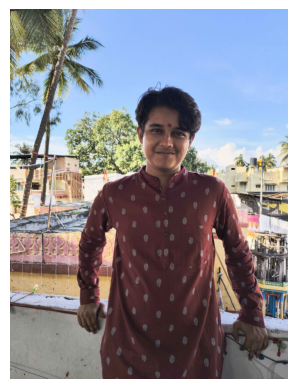

Similarity with 'A penguin in the snow': 0.1419
Similarity with 'A car on a road': 0.1838
Similarity with 'A penguin in the desert': 0.1848
Similarity with 'A car floating in the sky': 0.1724
Similarity with 'A tree in a forest': 0.1638
Similarity with 'A floating island with houses on it': 0.1713


In [1]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

# Get CLIP embeddings for image and text prompts
def get_clip_embeddings(image, prompts):
    inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        image_embeds = model.get_image_features(inputs["pixel_values"])
        text_embeds = model.get_text_features(inputs["input_ids"])
    # Normalize embeddings for cosine similarity
    image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
    text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)
    return image_embeds, text_embeds

# Calculate cosine similarity between image and each text prompt
def calculate_similarity(image_embeds, text_embeds, prompts):
    similarities = torch.matmul(image_embeds, text_embeds.T).squeeze()
    for i, prompt in enumerate(prompts):
        print(f"Similarity with '{prompt}': {similarities[i].item():.4f}")

# Display image and print contextual similarity scores
def analyze_image_context(image_path, prompts):
    image = load_image(image_path)
    image_embeds, text_embeds = get_clip_embeddings(image, prompts)

    # Display image
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    # Print similarity scores with each prompt
    calculate_similarity(image_embeds, text_embeds, prompts)

# Define the image path and text prompts
image_path = "/content/real 4.jpg"  # Replace with the path to your image

# Define plausible and implausible prompts to test context
prompts = [
    "A penguin in the snow",                 # Plausible context
    "A car on a road",                       # Plausible context
    "A penguin in the desert",               # Implausible context
    "A car floating in the sky",             # Implausible context
    "A tree in a forest",                    # Plausible context
    "A floating island with houses on it",   # Implausible context
]

# Run the contextual analysis
analyze_image_context(image_path, prompts)


The output of CLIP’s similarity scores, based on cosine similarity, ranges from -1 to 1.

*   1: A similarity score close to 1 means a very high similarity between the image and the text prompt, indicating that the content in the image strongly aligns with the description in the prompt.
*   0: A score around 0 suggests no particular alignment or similarity between the image and the text prompt. This could happen if the prompt is unrelated to the content of the image.


*   -1: A score close to -1 would indicate a strong negative correlation, meaning the image and prompt are highly dissimilar in feature space. However, in practice, you will typically see values between 0 and 1 when comparing reasonable text prompts to an image.


